<h1><b> The Sparks Foundation </b></h1>
<h1><b> Data Science and Business Analytics intern </b></h1>
<h2><b>Author: Anu Rithiga B</b></h2>
<h3><b>Task 6</b>: Prediction using decision tree algorithm. Create the Decision Tree classifier and visualize it graphically.<br>
<b>Dataset:</b> https://bit.ly/3kXTdox <br>
<b>Date</b>: 17/7/2021

<h2><b>Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2><b>Step 2: Importing Dataset 

In [ ]:
iris=pd.read_csv('/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<h2><b>Step 3: Data Exploration

<b>Data information 

In [ ]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b>Shape of the dataset 

In [ ]:
iris.shape

(150, 6)

<b>Size of the dataset 

In [ ]:
iris.size

900

<b>Checking for null values in the dataset 

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris['Species_class']=np.where(iris.Species=='Iris-virginica',1,np.where(iris.Species=='Iris-versicolor',2,3))

In [ ]:
iris.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [ ]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

<b>Summary of the dataset 

In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5
Species_class,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0


<b>Datatype involved in the dataset 

In [ ]:
print(iris.dtypes)
print(iris.info())

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
Species_class      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Species_class  150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None


<h3><b>Observations:<br></b></h3>
1. There are no missing values in the dataset.<br> 
2. Datatype conversion is not required.<br>  
3. Dataset is suitable to perform ML Techniques.<br>  
4. None of the columns has missing data values.<br> 

<h2><b>Step 4: Data Visualization

In [ ]:
Y = iris.iloc[0:,1:6]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


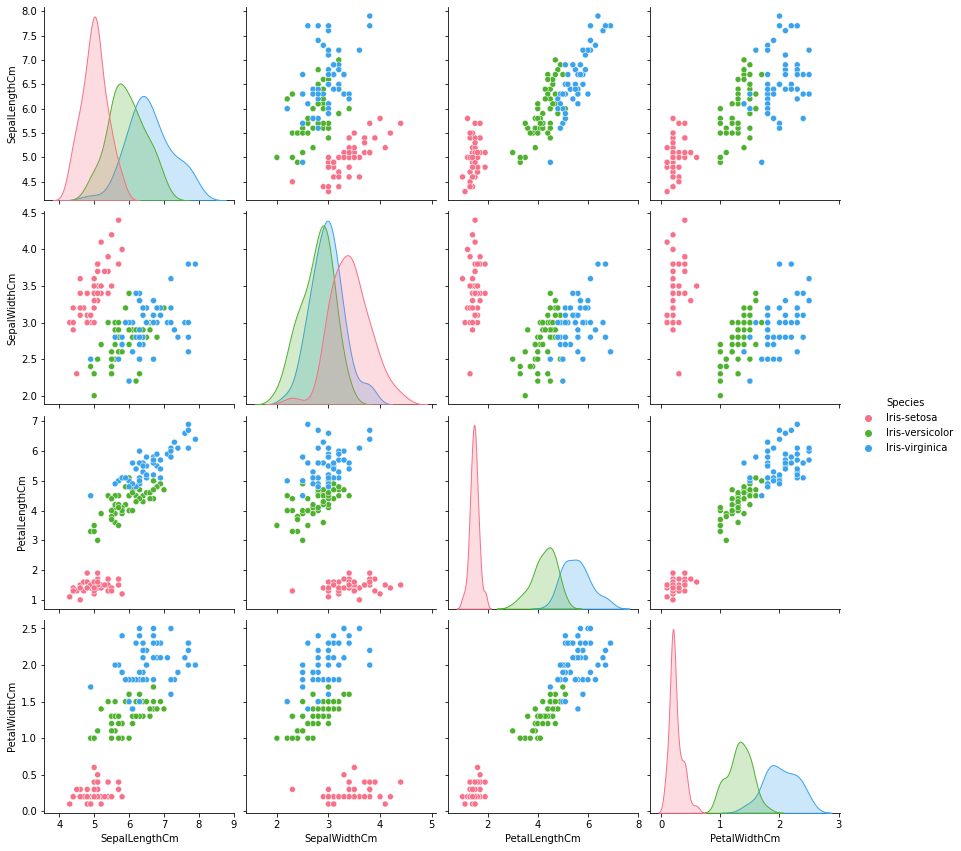

In [ ]:
sns.pairplot(Y, hue="Species", palette="husl", size=3)

<b>From the pairplot, we'll see that the Iris-setosa species is separated from the other two across all feature combinations

<b>Multivariate visualization technique using radviz Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

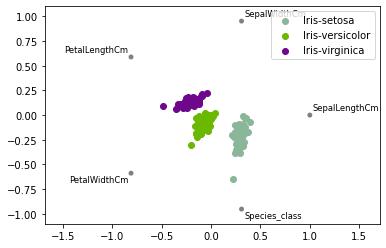

In [ ]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

<b>Plotting Andrews curves 

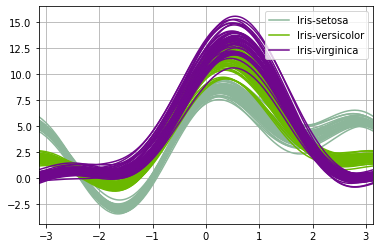

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<h2><b>Step 5: Model Building 

In [ ]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( iris[cols],
                                                  iris['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

<h2><b>Step 6: Model Preparation 

<b> Using grid search to find the optimum parameters 

In [ ]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
              

In [ ]:

tree.best_score_

0.9583333333333333

<b>Displaying the best parameters 

In [ ]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.best_params_

{'max_depth': 4, 'max_features': 2}

In [ ]:
train_pred = tree.predict(train_X)

In [ ]:
test_pred = tree.predict(test_X)

<h2><b>Step 7: Model training 

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<h2><b>Step 7: Final decision tree

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Displaying actual and the predicted values 

In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [ ]:
tree_test_pred.sample( n = 10 )

,actual,predicted
135,1,1
72,2,2
63,2,2
138,1,1
88,2,2
112,1,1
20,3,3
121,1,1
45,3,3
37,3,3


<b>Model Accuracy 

In [ ]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

<b>Heatmap of the confusion matrix 

Text(0.5, 15.0, 'Predicted label')

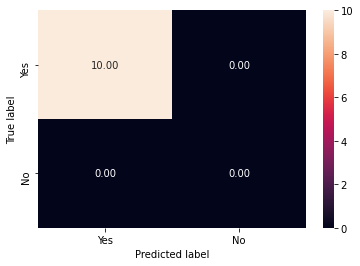

In [ ]:

tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2><b>Step 8: Visualizing the decision tree

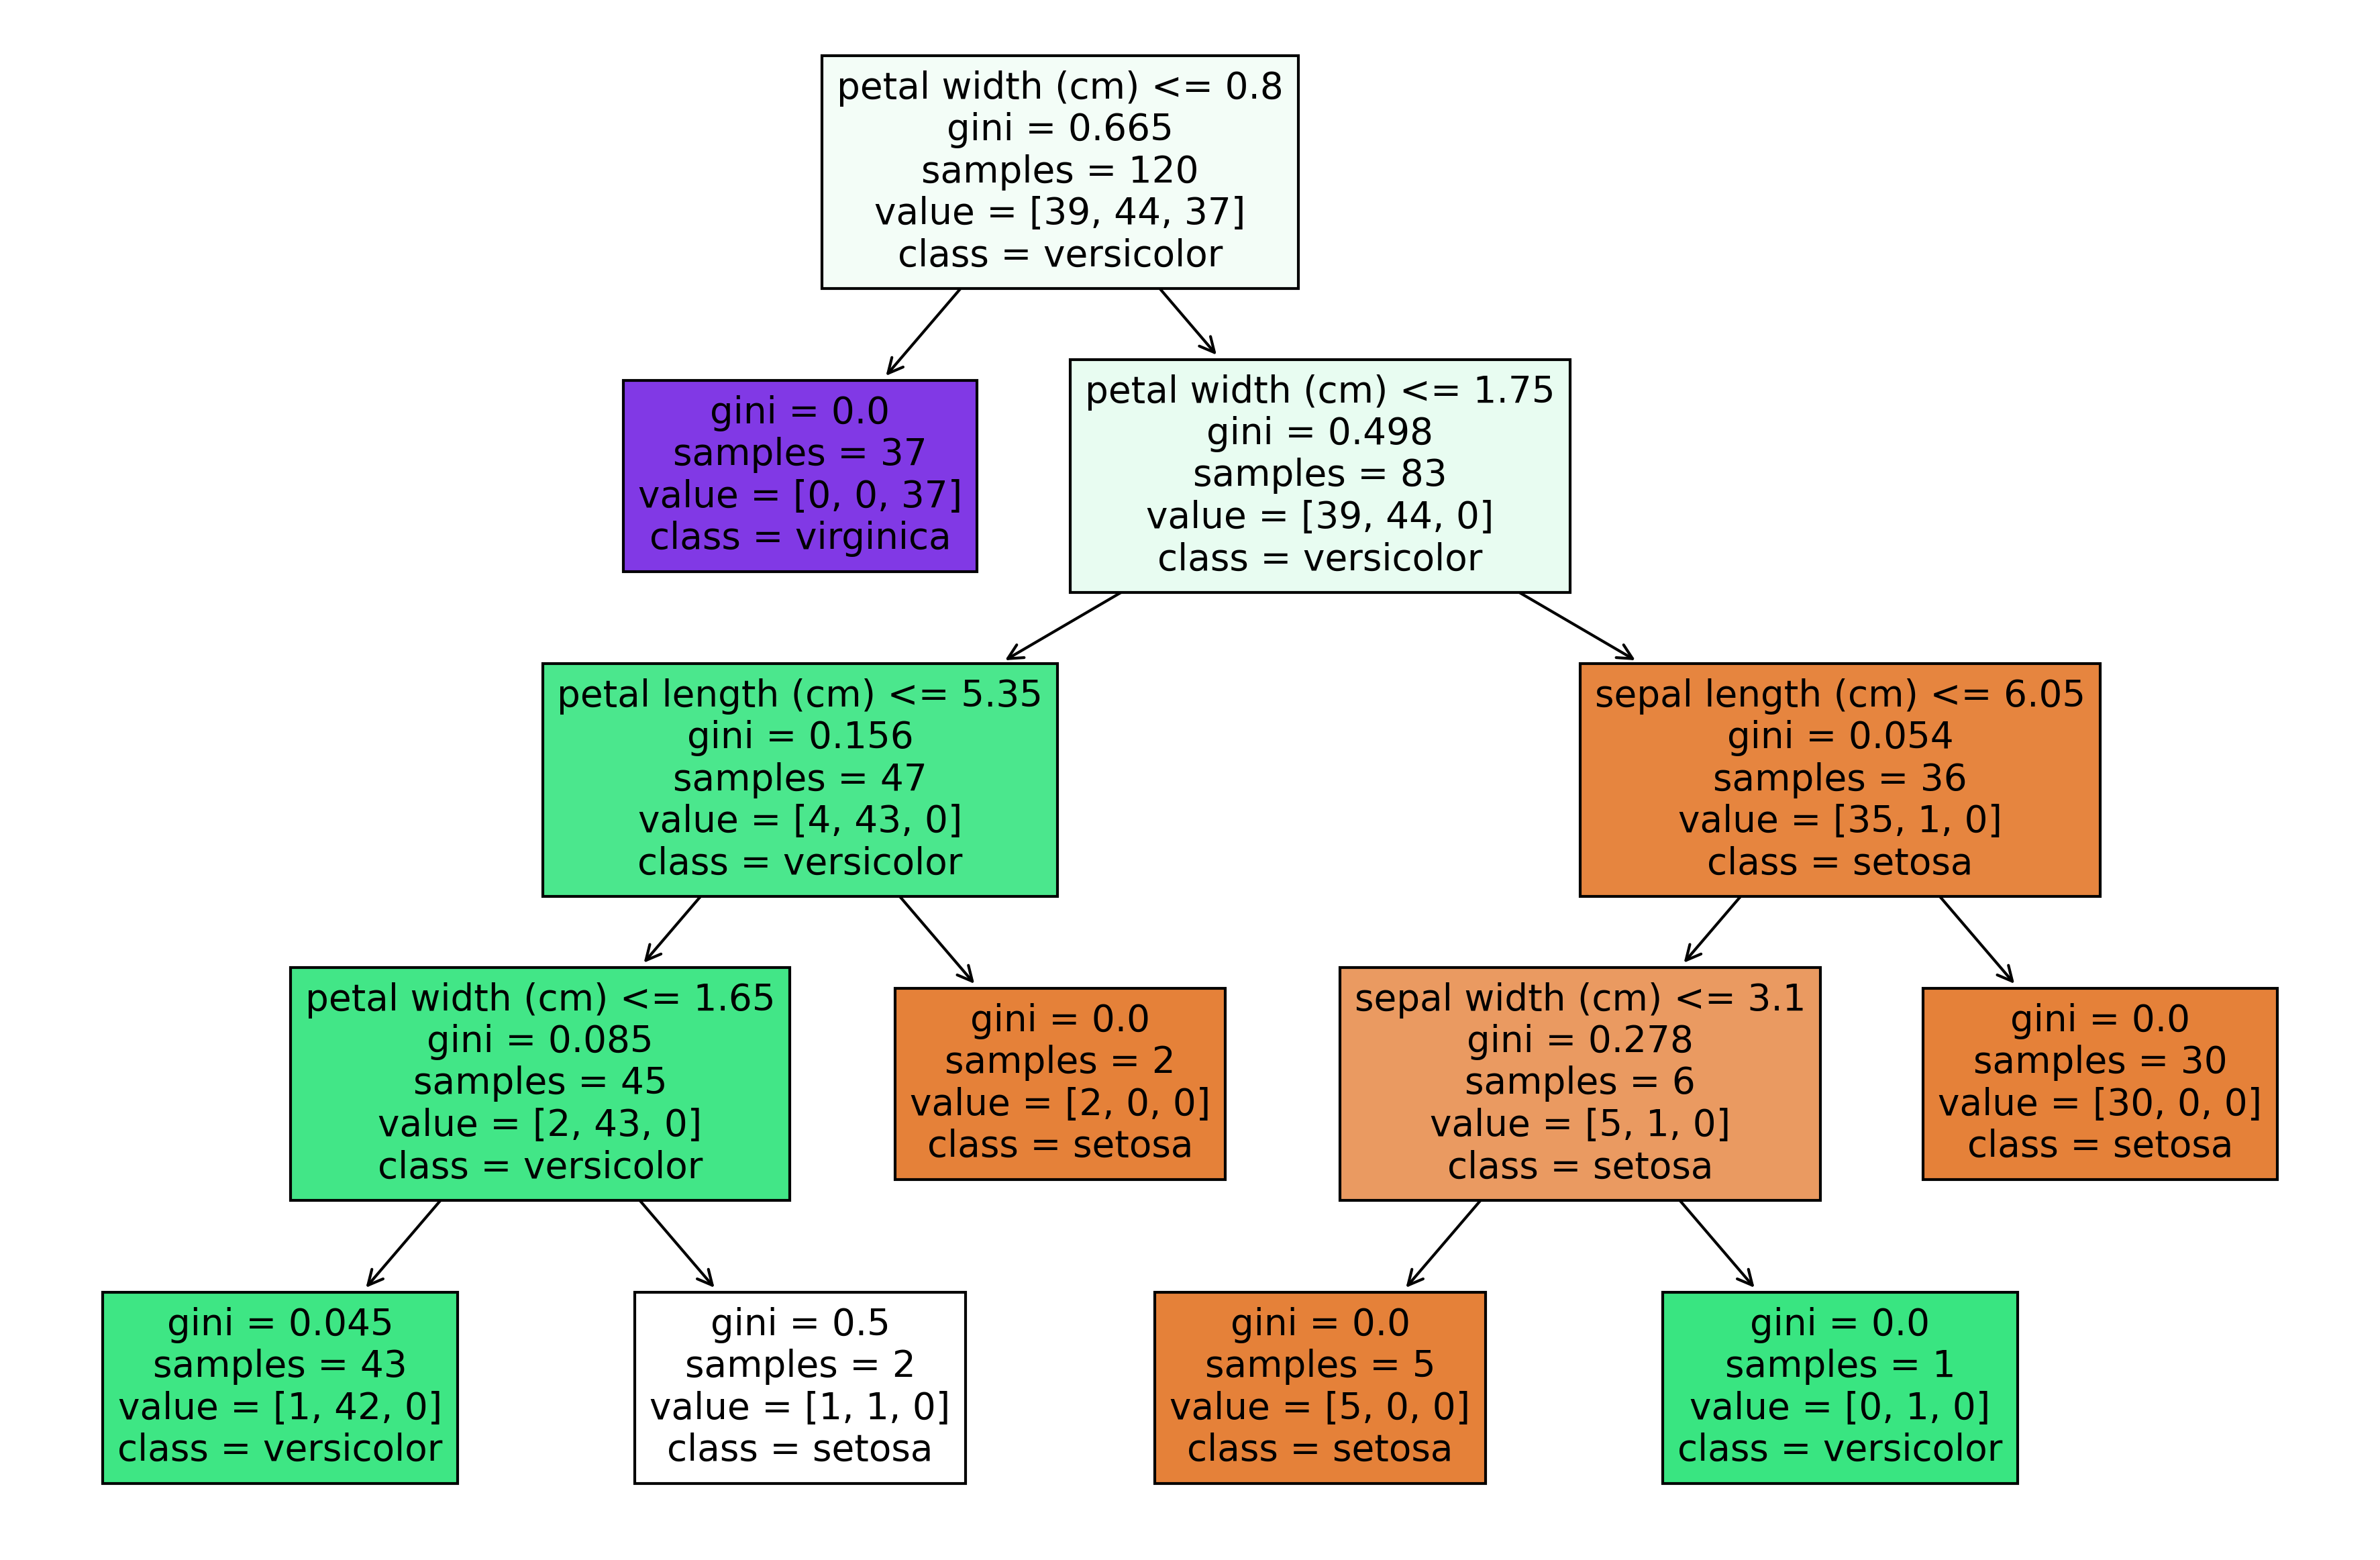

In [ ]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

<b><h1>Thank You!! Have a good day 